# 225229147

# Lab7. Exploration of DNN design choices using MNIST dataset

In [3]:
#importing necessary modules
import tensorflow as tf
import keras

In [4]:
#Loading the dataset
from keras.datasets import mnist
data = mnist.load_data()

In [5]:
(X_train,y_train),(X_test,y_test)=data
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

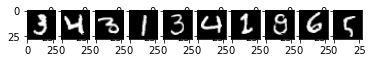

In [9]:
#Printing train images
import matplotlib.pyplot as plt
for i in range(1, 11):
    plt.subplot(1,10, i)
    plt.imshow(X_train[10*i], cmap=plt.get_cmap('gray'))

plt.show()

In [10]:
X_train = X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_test.shape

(10000, 784)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Exploration

#### 1. Number of Nodes

In [14]:
from tensorflow.keras import layers
import time
def create_and_train_model(nodes, epochs):
    model = tf.keras.Sequential([
        layers.Dense(nodes, activation='relu', input_shape=(784,)),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    end_time = time.time()
    
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    num_params = model.count_params()
    training_time = end_time - start_time
    
    return train_accuracy, test_accuracy, num_params, training_time


In [15]:
# List of hidden layer nodes
hidden_nodes_list = [4, 32, 18, 512, 2056]

for nodes in hidden_nodes_list:
    print(f"Number of nodes in hidden layer: {nodes}")
    train_acc, test_acc, num_params, training_time = create_and_train_model(nodes, epochs=10)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Number of Parameters: {num_params}")
    print(f"Training Time: {training_time:.2f} seconds\n")

Number of nodes in hidden layer: 4
Training Accuracy: 0.8771
Testing Accuracy: 0.8728
Number of Parameters: 3190
Training Time: 59.99 seconds

Number of nodes in hidden layer: 32
Training Accuracy: 0.9821
Testing Accuracy: 0.9675
Number of Parameters: 25450
Training Time: 68.49 seconds

Number of nodes in hidden layer: 18
Training Accuracy: 0.9703
Testing Accuracy: 0.9600
Number of Parameters: 14320
Training Time: 68.26 seconds

Number of nodes in hidden layer: 512
Training Accuracy: 0.9979
Testing Accuracy: 0.9813
Number of Parameters: 407050
Training Time: 224.20 seconds

Number of nodes in hidden layer: 2056
Training Accuracy: 0.9975
Testing Accuracy: 0.9798
Number of Parameters: 1634530
Training Time: 731.92 seconds



#### 2. Number of Layers

In [16]:
def create_and_train_model(num_layers, nodes, epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    for _ in range(num_layers):
        model.add(layers.Dense(nodes, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    end_time = time.time()
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    num_params = model.count_params()
    training_time = end_time - start_time
    
    return train_accuracy, test_accuracy, num_params, training_time

In [17]:
# List of hidden layer nodes to try
hidden_layers_list = [4, 6, 8, 16]

for num_layers in hidden_layers_list:
    print(f"Number of hidden layers: {num_layers}")
    train_acc, test_acc, num_params, training_time = create_and_train_model(num_layers, 32, epochs=10)
    print(f"Training Accuracy (10 epochs): {train_acc:.4f}")
    print(f"Testing Accuracy (10 epochs): {test_acc:.4f}")
    print(f"Number of Parameters: {num_params}")
    print(f"Training Time (10 epochs): {training_time:.2f} seconds\n")


Number of hidden layers: 4
Training Accuracy (10 epochs): 0.9853
Testing Accuracy (10 epochs): 0.9666
Number of Parameters: 28618
Training Time (10 epochs): 58.42 seconds

Number of hidden layers: 6
Training Accuracy (10 epochs): 0.9831
Testing Accuracy (10 epochs): 0.9654
Number of Parameters: 30730
Training Time (10 epochs): 86.95 seconds

Number of hidden layers: 8
Training Accuracy (10 epochs): 0.9806
Testing Accuracy (10 epochs): 0.9664
Number of Parameters: 32842
Training Time (10 epochs): 63.71 seconds

Number of hidden layers: 16
Training Accuracy (10 epochs): 0.9692
Testing Accuracy (10 epochs): 0.9593
Number of Parameters: 41290
Training Time (10 epochs): 85.66 seconds



In [18]:
for num_layers in hidden_layers_list:
    print(f"Number of hidden layers: {num_layers}")
    train_acc, test_acc, num_params, training_time = create_and_train_model(num_layers, 32, epochs=30)
    print(f"Training Accuracy (30 epochs): {train_acc:.4f}")
    print(f"Testing Accuracy (30 epochs): {test_acc:.4f}")
    print(f"Number of Parameters: {num_params}")
    print(f"Training Time (30 epochs): {training_time:.2f} seconds\n")

Number of hidden layers: 4
Training Accuracy (30 epochs): 0.9940
Testing Accuracy (30 epochs): 0.9711
Number of Parameters: 28618
Training Time (30 epochs): 143.89 seconds

Number of hidden layers: 6
Training Accuracy (30 epochs): 0.9889
Testing Accuracy (30 epochs): 0.9640
Number of Parameters: 30730
Training Time (30 epochs): 139.35 seconds

Number of hidden layers: 8
Training Accuracy (30 epochs): 0.9917
Testing Accuracy (30 epochs): 0.9702
Number of Parameters: 32842
Training Time (30 epochs): 170.97 seconds

Number of hidden layers: 16
Training Accuracy (30 epochs): 0.9871
Testing Accuracy (30 epochs): 0.9695
Number of Parameters: 41290
Training Time (30 epochs): 179.32 seconds



#### 3. Activation Function

In [19]:
def create_and_train_model(activation_func, epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    
    for _ in range(3):
        model.add(layers.Dense(32, activation=activation_func))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
 
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    return train_accuracy, test_accuracy

In [20]:
# List of activation functions 
activation_functions = ['sigmoid', 'tanh', 'relu']
for activation_func in activation_functions: #10 epochs
    print(f"Activation Function: {activation_func}")
    train_acc, test_acc = create_and_train_model(activation_func, epochs=10)
    print(f"Training Accuracy (10 epochs): {train_acc:.4f}")
    print(f"Testing Accuracy (10 epochs): {test_acc:.4f}\n")

Activation Function: sigmoid
Training Accuracy (10 epochs): 0.9786
Testing Accuracy (10 epochs): 0.9622

Activation Function: tanh
Training Accuracy (10 epochs): 0.9862
Testing Accuracy (10 epochs): 0.9669

Activation Function: relu
Training Accuracy (10 epochs): 0.9845
Testing Accuracy (10 epochs): 0.9677



In [21]:
for activation_func in activation_functions:
    print(f"Activation Function: {activation_func}") #30 epochs
    train_acc, test_acc = create_and_train_model(activation_func, epochs=30)
    print(f"Training Accuracy (30 epochs): {train_acc:.4f}")
    print(f"Testing Accuracy (30 epochs): {test_acc:.4f}\n")

Activation Function: sigmoid
Training Accuracy (30 epochs): 0.9931
Testing Accuracy (30 epochs): 0.9569

Activation Function: tanh
Training Accuracy (30 epochs): 0.9942
Testing Accuracy (30 epochs): 0.9626

Activation Function: relu
Training Accuracy (30 epochs): 0.9946
Testing Accuracy (30 epochs): 0.9698



#### 4. Activation Function Combinations

In [22]:
def create_and_train_model(activation_layer1, activation_layer2, activation_layer3, epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    model.add(layers.Dense(32, activation=activation_layer1))
    model.add(layers.Dense(32, activation=activation_layer2))
    model.add(layers.Dense(32, activation=activation_layer3))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    return train_accuracy, test_accuracy

In [23]:
# List of activation function 
activation_function_combinations = [
    ('sigmoid', 'relu', 'tanh'),
    ('relu', 'tanh', 'sigmoid'),
    ('tanh', 'sigmoid','relu')
]

results = {}

# Training and testing accuracies for each combination
for activation_func in activation_function_combinations:
    print(f"Layer 1: {activation_func[0]}, Layer 2: {activation_func[1]}, Layer 3: {activation_func[2]}")
    train_acc, test_acc = create_and_train_model(activation_func[0], activation_func[1], activation_func[2], epochs=10)
    print(f"Training Accuracy (10 epochs): {train_acc:.4f}")
    print(f"Testing Accuracy (10 epochs): {test_acc:.4f}\n")
    
    # Store the results in a dictionary
    results[activation_func] = (train_acc, test_acc)

Layer 1: sigmoid, Layer 2: relu, Layer 3: tanh
Training Accuracy (10 epochs): 0.9863
Testing Accuracy (10 epochs): 0.9684

Layer 1: relu, Layer 2: tanh, Layer 3: sigmoid
Training Accuracy (10 epochs): 0.9869
Testing Accuracy (10 epochs): 0.9700

Layer 1: tanh, Layer 2: sigmoid, Layer 3: relu
Training Accuracy (10 epochs): 0.9844
Testing Accuracy (10 epochs): 0.9631



In [24]:
# Find the best combination based on test accuracy
best_combination = max(results, key=lambda x: results[x][1])
print("Best Combination:", best_combination)

Best Combination: ('relu', 'tanh', 'sigmoid')


In [27]:
def create_and_train_model(hidden_layers, nodes_per_layer, activation_func, epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    
    for _ in range(hidden_layers):
        model.add(layers.Dense(nodes_per_layer, activation=activation_func))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    end_time = time.time()
    
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    num_params = model.count_params()
    training_time = end_time - start_time
    
    return train_accuracy, test_accuracy, num_params, training_time

# List of models 
models = [
    {'hidden_layers': 3, 'nodes_per_layer': 32, 'activation_func': 'relu'},
    {'hidden_layers': 3, 'nodes_per_layer': 64, 'activation_func': 'relu'},
    {'hidden_layers': 4, 'nodes_per_layer': 32, 'activation_func': 'relu'},
    {'hidden_layers': 4, 'nodes_per_layer': 64, 'activation_func': 'relu'},
    {'hidden_layers': 5, 'nodes_per_layer': 32, 'activation_func': 'relu'},
    {'hidden_layers': 5, 'nodes_per_layer': 64, 'activation_func': 'relu'}
]

# Training and testing accuracies, number of parameters, and training time 
results = []

for model_params in models:
    hidden_layers = model_params['hidden_layers']
    nodes_per_layer = model_params['nodes_per_layer']
    activation_func = model_params['activation_func']
    
    train_acc, test_acc, num_params, training_time = create_and_train_model(hidden_layers, nodes_per_layer, activation_func, epochs=10)
    
    result = {
        'hidden_layers': hidden_layers,
        'nodes_per_layer': nodes_per_layer,
        'activation_func': activation_func,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'num_params': num_params,
        'training_time': training_time
    }
    
    results.append(result)

In [28]:
# Find the best model based on test accuracy
best_model = max(results, key=lambda x: x['test_accuracy'])

# Print the results for each model
for result in results:
    print(f"Model: {result['hidden_layers']} hidden layers with {result['nodes_per_layer']} nodes each and {result['activation_func']} activation")
    print(f"Training Accuracy (10 epochs): {result['train_accuracy']:.4f}")
    print(f"Testing Accuracy (10 epochs): {result['test_accuracy']:.4f}")
    print(f"Number of Parameters: {result['num_params']}")
    print(f"Training Time (10 epochs): {result['training_time']:.2f} seconds\n")

print("Best Model:")
print(f"Model: {best_model['hidden_layers']} hidden layers with {best_model['nodes_per_layer']} nodes each and {best_model['activation_func']} activation")
print(f"Testing Accuracy (10 epochs): {best_model['test_accuracy']:.4f}")

Model: 3 hidden layers with 32 nodes each and relu activation
Training Accuracy (10 epochs): 0.9892
Testing Accuracy (10 epochs): 0.9705
Number of Parameters: 27562
Training Time (10 epochs): 56.80 seconds

Model: 3 hidden layers with 64 nodes each and relu activation
Training Accuracy (10 epochs): 0.9948
Testing Accuracy (10 epochs): 0.9770
Number of Parameters: 59210
Training Time (10 epochs): 79.26 seconds

Model: 4 hidden layers with 32 nodes each and relu activation
Training Accuracy (10 epochs): 0.9841
Testing Accuracy (10 epochs): 0.9667
Number of Parameters: 28618
Training Time (10 epochs): 68.43 seconds

Model: 4 hidden layers with 64 nodes each and relu activation
Training Accuracy (10 epochs): 0.9924
Testing Accuracy (10 epochs): 0.9763
Number of Parameters: 63370
Training Time (10 epochs): 65.11 seconds

Model: 5 hidden layers with 32 nodes each and relu activation
Training Accuracy (10 epochs): 0.9821
Testing Accuracy (10 epochs): 0.9673
Number of Parameters: 29674
Trainin

#### 6. Optimizer

In [29]:
def create_model(optimizer):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [31]:
# List of optimizers 
optimizers = ['sgd', 'rmsprop', 'adam']

for optimizer in optimizers:
    print(f"Optimizer: {optimizer.upper()}")
    model = create_model(optimizer)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")

Optimizer: SGD
Training Accuracy: 0.9639
Testing Accuracy: 0.9561

Optimizer: RMSPROP
Training Accuracy: 0.9797
Testing Accuracy: 0.9664

Optimizer: ADAM
Training Accuracy: 0.9828
Testing Accuracy: 0.9670



#### 7. L1,L2 Regularization

In [36]:
def create_and_train_model(regularizer, lambda_value , epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    
    for _ in range(3):
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizer(lambda_value)))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    return train_accuracy, test_accuracy

# Regularization functions with different lambda values
l1_regularization = tf.keras.regularizers.l1
l2_regularization = tf.keras.regularizers.l2

In [37]:
# List of lambda values
l1_lambda_values = [0.001, 0.01, 0.1]

# List of lambda values 
l2_lambda_values = [0.001, 0.01, 0.1]

# Training and testing accuracies for L1 regularization
print("L1 Regularization:")
for lambda_value in l1_lambda_values:
    print(f"Lambda Value: {lambda_value}")
    train_acc, test_acc = create_and_train_model(l1_regularization, lambda_value, epochs=10)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")

# Training and testing accuracies for L2 regularization
print("L2 Regularization:")
for lambda_value in l2_lambda_values:
    print(f"Lambda Value: {lambda_value}")
    train_acc, test_acc = create_and_train_model(l2_regularization, lambda_value, epochs=10)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")

L1 Regularization:
Lambda Value: 0.001
Training Accuracy: 0.9506
Testing Accuracy: 0.9498

Lambda Value: 0.01
Training Accuracy: 0.1124
Testing Accuracy: 0.1135

Lambda Value: 0.1
Training Accuracy: 0.1124
Testing Accuracy: 0.1135

L2 Regularization:
Lambda Value: 0.001
Training Accuracy: 0.9761
Testing Accuracy: 0.9717

Lambda Value: 0.01
Training Accuracy: 0.9503
Testing Accuracy: 0.9477

Lambda Value: 0.1
Training Accuracy: 0.8554
Testing Accuracy: 0.8587



#### 8. Dropout Regularization

In [38]:
def create_and_train_model(dropout_rate, epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    
    for _ in range(3):
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    return train_accuracy, test_accuracy

In [ ]:
# List of dropout rates
dropout_rates = [0.1, 0.3, 0.5]

# Training and testing accuracies for different dropout rates
print("Dropout Layers:")
for dropout_rate in dropout_rates:
    print(f"Dropout Rate: {dropout_rate}")
    train_acc, test_acc = create_and_train_model(dropout_rate, epochs=10)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")

Dropout Layers:
Dropout Rate: 0.1


#### 9. Input Size

In [ ]:
X_train_56 = tf.image.resize(np.expand_dims(X_train, -1), [56, 56]).numpy().reshape(-1, 56*56) / 255.0
X_train_112 = tf.image.resize(np.expand_dims(X_train, -1), [112, 112]).numpy().reshape(-1, 112*112) / 255.0
X_train_224 = tf.image.resize(np.expand_dims(X_train, -1), [224, 224]).numpy().reshape(-1, 224*224) / 255.0

X_test_56 = tf.image.resize(np.expand_dims(X_test, -1), [56, 56]).numpy().reshape(-1, 56*56) / 255.0
X_test_112 = tf.image.resize(np.expand_dims(X_test, -1), [112, 112]).numpy().reshape(-1, 112*112) / 255.0
X_test_224 = tf.image.resize(np.expand_dims(X_test, -1), [224, 224]).numpy().reshape(-1, 224*224) / 255.0

# Function to create and train a model
def create_and_train_model(input_shape, epochs):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    return model.count_params(), train_accuracy, test_accuracy

# List of input shapes
input_shapes = [(784,), (56*56,), (112*112,), (224*224,)]

# Training and testing accuracies, and model size for each input shape
print("Model Size and Accuracies:")
for input_shape in input_shapes:
    print(f"Input Shape: {input_shape}")
    model_size, train_acc, test_acc = create_and_train_model(input_shape, epochs=10)
    print(f"Model Size: {model_size}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")

#### 10. Dataset Size

In [ ]:
(X_train, y_train), (X_test, y_test) = data
X1 = np.concatenate((X_train, X_test))
y1 = np.concatenate((y_train, y_test))

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, random_state=42)
model = Sequential([Dense(32, input_dim=28*28, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(10, activation='softmax')]) 
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
model.fit(X_train1, y_train1, epochs=10) 
acc=model.evaluate(X_test1, y_test1)
print("Accuracy",acc[1]*100)
print(model.summary())